# Closest Pair Algorithms

## Problem
From a given set of coordiate points, we have to find the points that are closest to each other. The 1D closest pair problem can be solved by simply sorting the array and sweeping through the sorted array finding the consecutive entries with the least difference. Thus, the solution to the 1D problem has a time complexity of $O(n \log n)$.

The 2D closest pair problem is somewhat more interesting. The most naive approach towards solving the problem is simply to check for all $n \choose 2$ possibilities. However, this gives us a time complexity of $O(n^{2})$. Fortunately we can do better than this.

Plotting the points on an XY plane somewhat gives away the notion that this problem can be solved with a divide and conquer approach. 

And, indeed we can. But first, let us visualise the problem better with the help of actual inputs and plots. 

## Inputs 
We will generate random pairs of floating point numbers for our input set. We must take special care that none of the pairs are repeated, otherwise the closest pair will those two same points with the a distance of zero. I think that's rather uninteresting.

In [1]:
import random
point_list = []
num_of_pts = 100

for i in range(num_of_pts):
    point_list.append({
        "x": random.random()*random.randint(0, 100),
        "y": random.random()*random.randint(0, 100)
    })

We begin with a set of 100 points. Let's visualise this with the help of an XY plot.

Text(0.5, 1.0, 'Plot of Points')

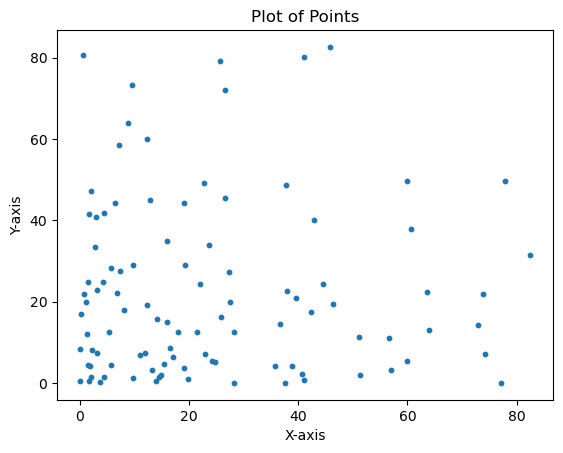

In [2]:
import matplotlib.pyplot as plt

x_values = []
y_values = []

for each_point in point_list:
    x_values.append(each_point["x"])
    y_values.append(each_point["y"])

# Plotting on the XY plane
plt.scatter(x_values, y_values, s=10)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points')

## Brute force
Now, let's use brute force to find the closest pair. We will later confirm this with the divide and conquer algorithm.

{'x': 1.8472680716461616, 'y': 4.132455008358413}
{'x': 1.5479720631527738, 'y': 4.333929925411494}
distance = 0.360791134732576


Text(0.5, 1.0, 'Plot of Points')

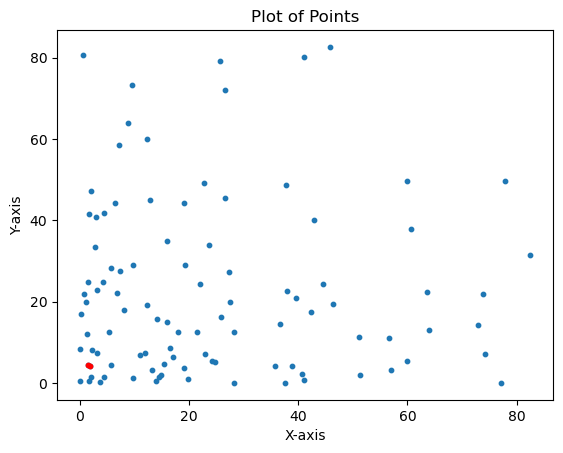

In [3]:
import math

def cp_brute(point_list):
    min_dist = float('inf')
    final_pair = None
    for point_1 in point_list:
        for point_2 in point_list:
            if point_1 != point_2:
                dist = math.sqrt((point_1["x"] - point_2["x"])
                                ** 2 + (point_1["y"] - point_2["y"])**2)
                if dist < min_dist:
                    min_dist = dist
                    final_pair = point_1, point_2
    return final_pair

p1, p2 = cp_brute(point_list)
print(p1)
print(p2)
print("distance = " + str(math.sqrt((p1["x"] - p2["x"])**2 + (p1["y"] - p2["y"])**2)))

# Plotting on the XY plane
plt.scatter(x_values, y_values, s=10)
plt.scatter([p1["x"], p2["x"]], [p1["y"], p2["y"]], s=10, color='red') 

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points')

The red marked dots are the closest.

## Divide and Conquer Approach
The divide and conquer approach involves sorting the set of points both with respect to the $x$ coordinates and the $y$ coordinates. We use the $x$-sorted list to divide the set of points into two halves, solve the problem recursively on the both halves. Let the shortest distances obtained from the two halves be $d_1$ and $d_2$. Now, we compare the points that are across the boundary between the two halves. To do this, we use the $y$-sorted list. We start checking from the top of the plot, and at each iteration, we compare a point with its next $6$ points. Why the number $6$? Well, it has to do with packing of points in a given rectangle of breadth $\min(d_1, d_2)$ and length $2\min(d_1, d_2)$. We can pack a maximum of six points in that rectangle.

More on why we compare $6$ points: https://www.cs.mcgill.ca/~cs251/ClosestPair/ClosestPairDQ.html

This gives us a $O(n \log n)$ algorithm - a significant improvement over the bruteforce approach.

Now, let's implent this and confirm our previous result.

{'x': 1.8472680716461616, 'y': 4.132455008358413}
{'x': 1.5479720631527738, 'y': 4.333929925411494}
Distance = 0.360791134732576


Text(0.5, 1.0, 'Plot of Points')

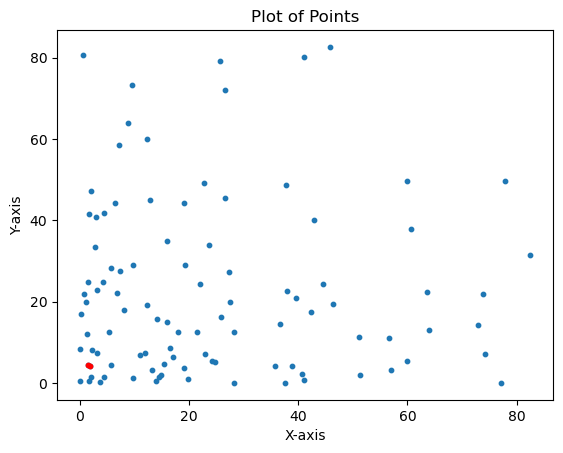

In [4]:
sorted_wrt_x = sorted(point_list, key=lambda d: d["x"])
sorted_wrt_y = sorted(point_list, key=lambda d: d["y"])

def get_distance(p1, p2):
    return math.sqrt((p1["x"] - p2["x"])**2 + (p1["y"] - p2["y"])**2)

def get_closest_pair(sorted_wrt_x, sorted_wrt_y):
    if len(sorted_wrt_x) == 1:
        return None 
    elif len(sorted_wrt_x) == 2:
        return sorted_wrt_x[0], sorted_wrt_x[1]
    elif len(sorted_wrt_x) == 3:
        dist_01 = get_distance(sorted_wrt_x[0], sorted_wrt_x[1])
        dist_02 = get_distance(sorted_wrt_x[0], sorted_wrt_x[2])
        dist_12 = get_distance(sorted_wrt_x[1], sorted_wrt_x[2])

        min_dist = min(dist_01, dist_02, dist_12)
        if min_dist == dist_01:
            return sorted_wrt_x[0], sorted_wrt_x[1]
        elif min_dist == dist_02:
            return sorted_wrt_x[0], sorted_wrt_x[2]
        else: 
            return sorted_wrt_x[1], sorted_wrt_x[2]

    else:
        mid_point_index = len(sorted_wrt_x) // 2
        mid_point = sorted_wrt_x[mid_point_index]
        left_point_one, left_point_two = get_closest_pair(sorted_wrt_x[:mid_point_index], sorted_wrt_y)
        right_point_one, right_point_two = get_closest_pair(sorted_wrt_x[mid_point_index:], sorted_wrt_y)

        if get_distance(left_point_one, left_point_two) < get_distance(right_point_one, right_point_two):
            final_pair = left_point_one, left_point_two
            min_dist = get_distance(left_point_one, left_point_two)
        else: 
            final_pair = right_point_one, right_point_two
            min_dist = get_distance(right_point_one, right_point_two)
        
        index = 0
        for each_point in sorted_wrt_y:
            if each_point["x"] <= mid_point["x"] + min_dist and each_point["x"] >= mid_point["x"] - min_dist:
                j = 1
                while j in range(1, 7) and (index + j) < len(sorted_wrt_y):
                    temp_dist = get_distance(each_point, sorted_wrt_y[index + j])
                    if temp_dist < min_dist:
                        min_dist = temp_dist
                        final_pair = each_point, sorted_wrt_y[index + j]
                    j += 1
            index += 1
    return final_pair

p1, p2 = get_closest_pair(sorted_wrt_x, sorted_wrt_y)

print(p1)
print(p2)
print("Distance =", get_distance(p1, p2))

# Plotting on the XY plane
plt.scatter(x_values, y_values, s=10)
plt.scatter([p1["x"], p2["x"]], [p1["y"], p2["y"]], s=10, color='red') 

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points')

As evident from the output plot, the algorithm indeed gives us the correct answer.

## A Randomized Algorithm
We demonstrate a randomized algorithm that promises a linear time complexity based on the paper by [Khuller and Matias](https://www.cs.umd.edu/~samir/grant/cp.pdf).

In [5]:
def randomized_cp(point_list):
    sample_space = list(point_list)

    while len(sample_space):
        randpoint = random.choice(point_list)
        min_dist = float('inf')
        for each_point in sample_space:
            if each_point != randpoint:
                temp_dist = get_distance(each_point, randpoint)
                if temp_dist < min_dist:
                    min_dist = temp_dist
        
        mesh_len = min_dist // 3
        #  to build the best I need to find out the max and min value of x and y coordinates
        # then we can break up the coordinates accordingly
        max_x_coordinate = - float('inf')
        max_y_coordinate = - float('inf')
        min_x_coordinate = float('inf')
        min_y_coordinate = float('inf')

        for each_point in sample_space:
            x = each_point['x']
            y = each_point['y']
            if x > max_x_coordinate:
                max_x_coordinate = x
            if x < min_x_coordinate:
                min_x_coordinate = x 
            if y > max_y_coordinate:
                max_y_coordinate = y
            if y < min_y_coordinate:
                min_y_coordinate = y
        
        mesh = {}
        for i in range(min_x_coordinate, max_x_coordinate + 1):
            

## Performance: Brute force vs. Divide & Conquer

We can check the performance differnce between the two algorithms by measuring the time taken by each algorith for large inputs.

In [6]:
# import time
# brute_input = []
# brute_time = []

# dnq_input = []
# dnq_time = [] 
# test_cases = 1000
# for num_of_pts in range(3, test_cases):
#     brute_input.append(num_of_pts)
#     dnq_input.append(num_of_pts)
#     test_pts = []
#     for i in range(num_of_pts):
#         test_pts.append({
#             "x": random.random()*random.randint(0, 100),
#             "y": random.random()*random.randint(0, 100)
#         })

#     start_time = time.perf_counter()
#     cp_brute(test_pts)
#     end_time = time.perf_counter()
#     time_function_1 = end_time - start_time
#     brute_time.append(time_function_1)

#     # Measure the execution time of function 2
#     start_time = time.perf_counter()
#     get_closest_pair(sorted(test_pts, key=lambda d: d["x"]), sorted(test_pts, key=lambda d: d["y"]))
#     end_time = time.perf_counter()
#     time_function_2 = end_time - start_time
#     dnq_time.append(time_function_2)

# plt.plot(brute_input, brute_time, color="red", label="Brute force")
# plt.plot(dnq_input, dnq_time, color="blue", label="Divide & Conquer")

# plt.title("Performance Comparison")
# plt.xlabel("Number of points")
# plt.ylabel("Time (ms)")
# plt.legend()
# plt.show()

As evident from the graph, the time taken by brute force algorithm grows rapidly in comparison to the divie and conquer approach. 

Therefore, the divide and conquer algorithm is the clear winner here.